# Análisis Cuantitativo de Impacto Sector Externo RD por Posible Recesión USA, con Técnicas de Machine Learning.

El objetivo de este análisis es identificar la influencia de las principales variables macroeconomicas de Estados Unidos en las principales variables del Sector Externo de RD, con el propósito de cuantificar el efecto de una posible recesión en USA.

**Periodo de referencia:** 2012 - 2022 (septiembre)

**Variables a analizar Sector Externo RD (variables objetivo):**

1. Exportaciones por Trimestre en Millones USD 
2. Importaciones por Trimestre en Millones USD
3. Reservas Promedios en Millones USD del Trimestre
4. Llegada de pasajeros turistas en Miles de Personas por Trimestre
5. Tipo de Cambio Promedio USD - DOP por Trimestre 
6. Inversión Directa por Trimestre en Millones USD
7. Tasa Política Monetaria promedio del Trimestre

**Variables a analizar USA (variables explicativas):**

1. Crecimiento PIB del Trimestre
2. Inflación Interanual al final del Trimestre
3. Inflación Subyacente Interanual al final del Trimestre
4. Tasa de Empleo al final del Trimestre

**Realizado por:** Gilberto Almonte-F

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'DataConsolidada.xlsx', sheet_name='DataFinal')

In [3]:
df.head()

,Years,Trimestre,AcumExportUSDMM,AcumImportacionesUSDMM,PromReservUSDMM,AcumTuristas,AcumRemesasMMUSD,PromTCUSDDOP,AcumInversionDirectaUSAMMUSD,PromTPMRD,PIBUSA,InflacionInteranualUSA,InflacionSubInteranualUSA,TasaEmpleoUSA
0,2012,Qtr1,1642.537582,4165.9,3019.300000,1466.632,1076.130013,38.931751,87.143711,0.0675,3.3,4.944763,3.942909,66.986521
1,2012,Qtr2,1797.295512,4441.3,3119.000000,1212.477,1014.339347,39.035019,343.891855,0.0650,1.8,2.711384,3.360025,67.128837
2,2012,Qtr3,1843.491812,4570.8,3125.084829,1205.595,1053.346365,39.132064,492.684683,0.0550,0.7,2.604409,3.533806,67.313561
3,2012,Qtr4,1912.387255,4473.8,3107.966667,1162.317,901.555860,39.844732,251.600000,0.0500,0.4,3.906830,3.745603,67.296614
4,2013,Qtr1,1794.970135,3975.5,3184.500000,1458.588,1116.686295,40.769489,108.315449,0.0500,3.5,4.973798,5.234861,67.177086


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Years                         43 non-null     int64  
 1   Trimestre                     43 non-null     object 
 2   AcumExportUSDMM               43 non-null     float64
 3   AcumImportacionesUSDMM        43 non-null     float64
 4   PromReservUSDMM               43 non-null     float64
 5   AcumTuristas                  43 non-null     float64
 6   AcumRemesasMMUSD              43 non-null     float64
 7   PromTCUSDDOP                  43 non-null     float64
 8   AcumInversionDirectaUSAMMUSD  43 non-null     float64
 9   PromTPMRD                     43 non-null     float64
 10  PIBUSA                        43 non-null     float64
 11  InflacionInteranualUSA        43 non-null     float64
 12  InflacionSubInteranualUSA     43 non-null     float64
 13  TasaEmp

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Years,AcumExportUSDMM,AcumImportacionesUSDMM,PromReservUSDMM,AcumTuristas,AcumRemesasMMUSD,PromTCUSDDOP,AcumInversionDirectaUSAMMUSD,PromTPMRD,PIBUSA,InflacionInteranualUSA,InflacionSubInteranualUSA,TasaEmpleoUSA
count,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00
mean,"2,016.88","2,330.56","4,852.03","6,912.36","1,487.42","1,593.60",48.19,399.96,0.05,2.36,3.87,3.51,69.20
std,3.14,406.79,"1,028.85","3,330.51",407.52,530.42,5.85,327.36,0.01,7.43,2.55,1.67,1.65
min,"2,012.00","1,642.54","3,534.10","3,019.30",5.32,901.56,38.93,-280.70,0.03,-29.90,0.39,1.52,64.77
25%,"2,014.00","2,013.81","4,294.45","4,469.38","1,342.06","1,175.38",43.76,206.44,0.05,1.25,1.97,2.21,67.91
50%,"2,017.00","2,221.54","4,474.70","6,305.50","1,566.83","1,454.91",47.34,343.89,0.05,2.40,3.29,2.97,69.20
75%,"2,019.50","2,527.39","5,064.30","7,911.26","1,734.00","1,782.88",53.04,539.33,0.06,3.35,4.96,4.59,70.63
max,"2,022.00","3,381.79","8,173.10","14,371.55","2,033.42","2,714.38",58.32,"1,362.30",0.08,35.30,9.48,7.11,71.71


In [6]:
df['YearsQ'] = df['Years'].astype(str)+df['Trimestre']

In [7]:
df.head()

,Years,Trimestre,AcumExportUSDMM,AcumImportacionesUSDMM,PromReservUSDMM,AcumTuristas,AcumRemesasMMUSD,PromTCUSDDOP,AcumInversionDirectaUSAMMUSD,PromTPMRD,PIBUSA,InflacionInteranualUSA,InflacionSubInteranualUSA,TasaEmpleoUSA,YearsQ
0,2012,Qtr1,"1,642.54","4,165.90","3,019.30","1,466.63","1,076.13",38.93,87.14,0.07,3.30,4.94,3.94,66.99,2012Qtr1
1,2012,Qtr2,"1,797.30","4,441.30","3,119.00","1,212.48","1,014.34",39.04,343.89,0.07,1.80,2.71,3.36,67.13,2012Qtr2
2,2012,Qtr3,"1,843.49","4,570.80","3,125.08","1,205.60","1,053.35",39.13,492.68,0.05,0.70,2.60,3.53,67.31,2012Qtr3
3,2012,Qtr4,"1,912.39","4,473.80","3,107.97","1,162.32",901.56,39.84,251.60,0.05,0.40,3.91,3.75,67.30,2012Qtr4
4,2013,Qtr1,"1,794.97","3,975.50","3,184.50","1,458.59","1,116.69",40.77,108.32,0.05,3.50,4.97,5.23,67.18,2013Qtr1


In [8]:
df.tail()

,Years,Trimestre,AcumExportUSDMM,AcumImportacionesUSDMM,PromReservUSDMM,AcumTuristas,AcumRemesasMMUSD,PromTCUSDDOP,AcumInversionDirectaUSAMMUSD,PromTPMRD,PIBUSA,InflacionInteranualUSA,InflacionSubInteranualUSA,TasaEmpleoUSA,YearsQ
38,2021,Qtr3,"2,989.48","6,090.80","12,712.13","1,588.87","2,598.24",56.81,"1,080.80",0.03,2.70,7.74,6.10,69.94,2021Qtr3
39,2021,Qtr4,"2,960.79","7,081.60","12,579.44","1,876.26","2,541.16",56.52,"1,362.30",0.03,7.00,8.50,6.87,70.79,2021Qtr4
40,2022,Qtr1,"3,051.63","6,950.00","13,939.90","1,889.21","2,396.20",56.24,352.70,0.05,-1.60,9.05,6.99,71.31,2022Qtr1
41,2022,Qtr2,"3,265.22","8,035.40","14,371.55","2,012.68","2,464.85",54.91,720.60,0.06,-0.60,9.48,7.11,71.24,2022Qtr2
42,2022,Qtr3,"3,381.79","8,173.10","13,998.89","2,011.02","2,448.41",54.09,"1,074.00",0.08,3.20,8.63,7.04,71.43,2022Qtr3


In [9]:
variables_objetivo = ['AcumExportUSDMM',
                      'AcumImportacionesUSDMM',
                      'PromReservUSDMM',
                      'AcumTuristas',
                      'AcumRemesasMMUSD',
                      'PromTCUSDDOP',
                      'AcumInversionDirectaUSAMMUSD']

variables_explicativas = ['PIBUSA','InflacionInteranualUSA','TasaEmpleoUSA','PromTPMRD']

In [10]:
variables_objetivo_dic = {'AcumExportUSDMM':'Exportaciones en USDMM',
                          'AcumImportacionesUSDMM':'Importaciones en USDMM',
                          'PromReservUSDMM':'Reservas en USDMM',
                          'AcumTuristas':'Turistas',
                          'AcumRemesasMMUSD':'Remesas en USDMM',
                          'PromTCUSDDOP':'Tipo de Cambio',
                          'AcumInversionDirectaUSAMMUSD':'Inversion Directa en USDMM'}

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
df_scale = pd.DataFrame(scaler.fit_transform(df[variables_objetivo+variables_explicativas]),
                        columns = df[variables_objetivo+variables_explicativas].columns)

In [14]:
df_scale['YearsQ'] = df['YearsQ']

Los datos han sido escalados para apreciar el movimiento de las variables, indistintamente de la magnitud de sus unidades.
------------------------------------------------------------------------------
Exploración Visual con Variable:  Exportaciones en USDMM
------------------------------------------------------------------------------


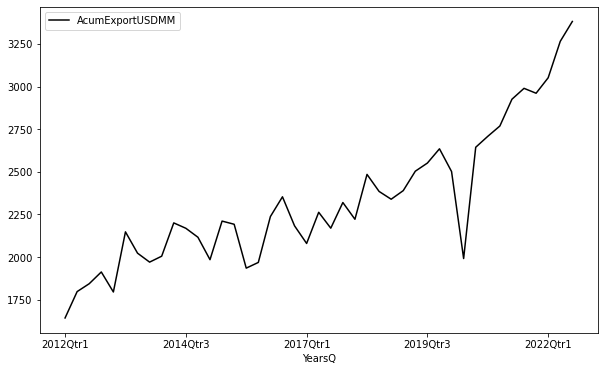

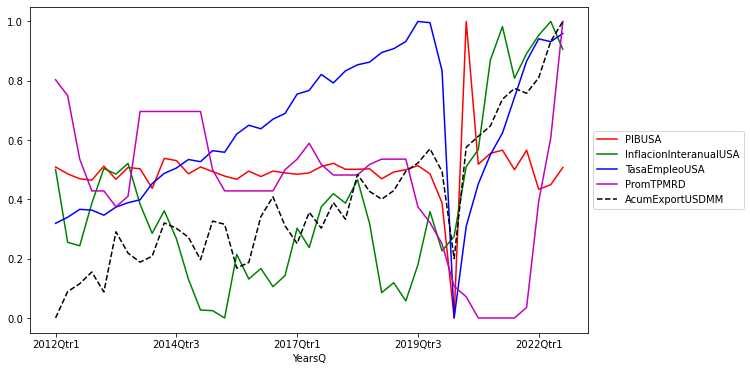

------------------------------------------------------------------------------
Exploración Visual con Variable:  Importaciones en USDMM
------------------------------------------------------------------------------


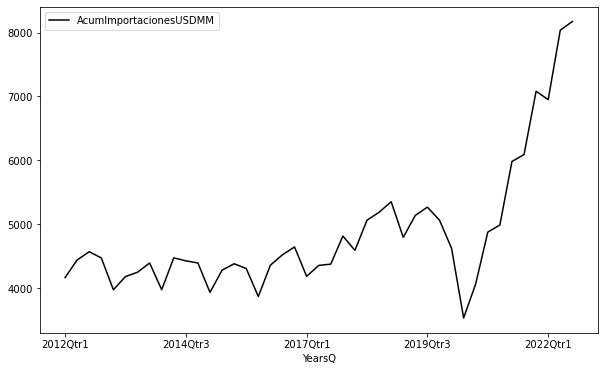

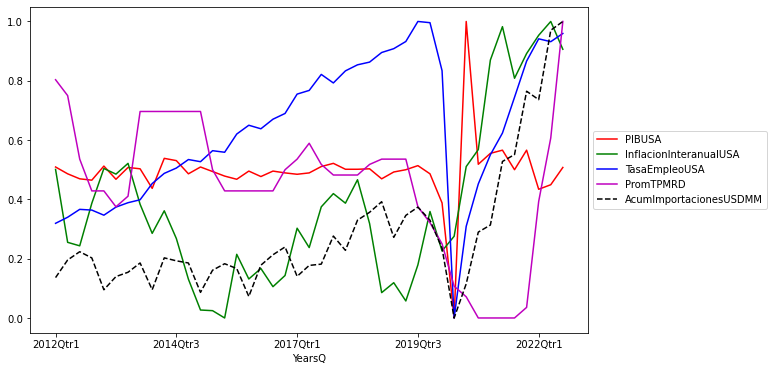

------------------------------------------------------------------------------
Exploración Visual con Variable:  Reservas en USDMM
------------------------------------------------------------------------------


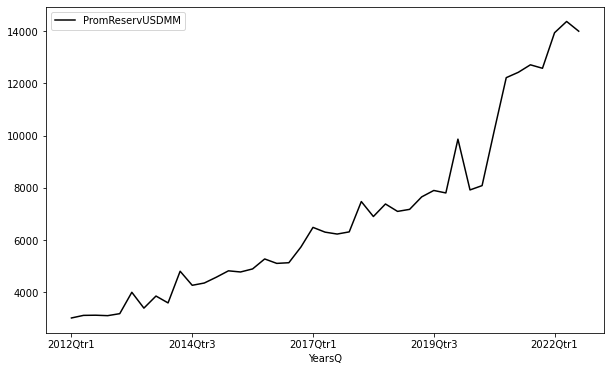

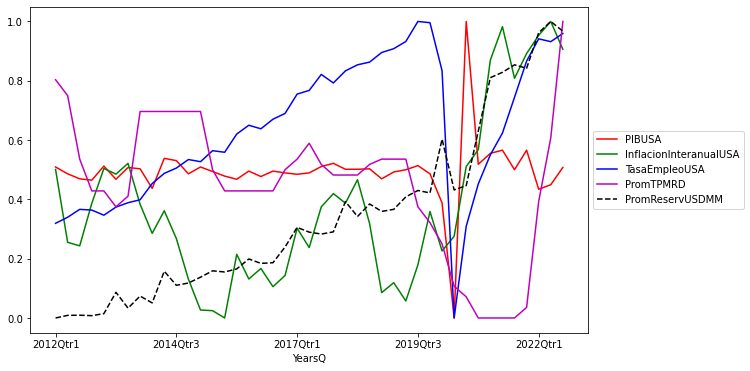

------------------------------------------------------------------------------
Exploración Visual con Variable:  Turistas
------------------------------------------------------------------------------


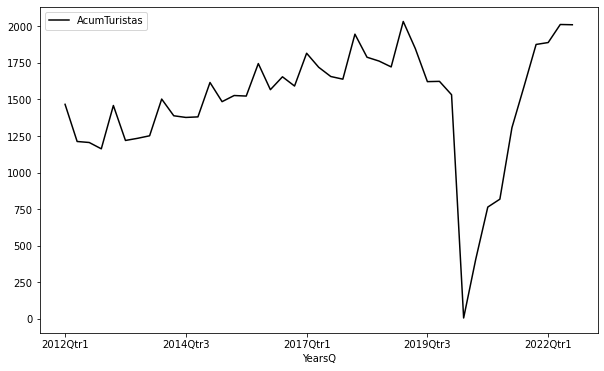

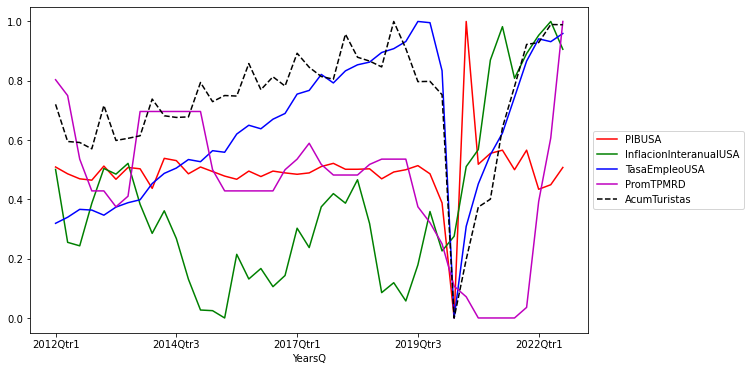

------------------------------------------------------------------------------
Exploración Visual con Variable:  Remesas en USDMM
------------------------------------------------------------------------------


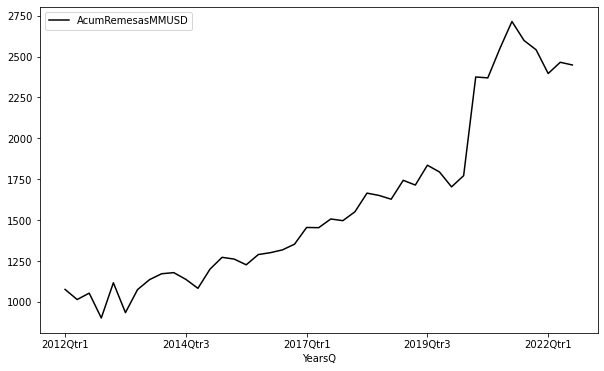

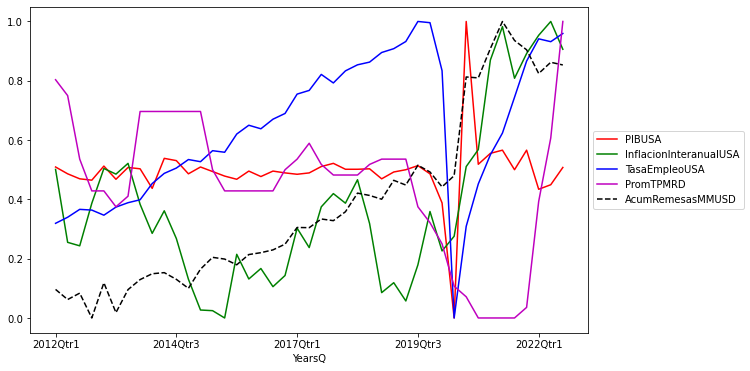

------------------------------------------------------------------------------
Exploración Visual con Variable:  Tipo de Cambio
------------------------------------------------------------------------------


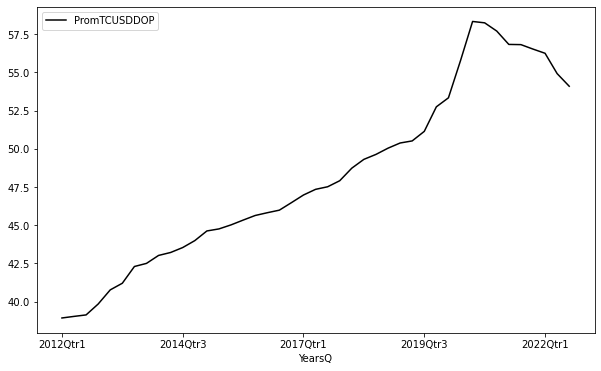

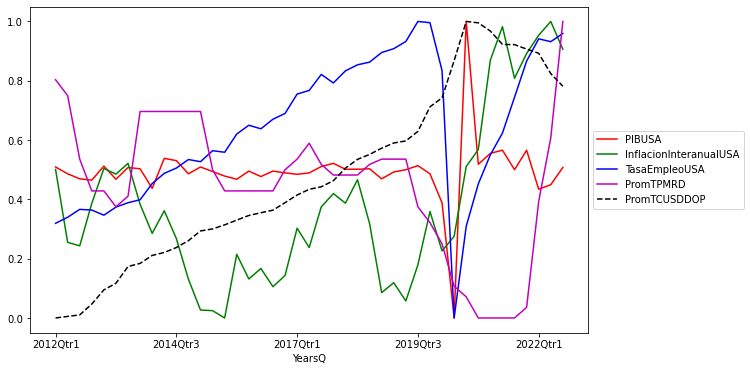

------------------------------------------------------------------------------
Exploración Visual con Variable:  Inversion Directa en USDMM
------------------------------------------------------------------------------


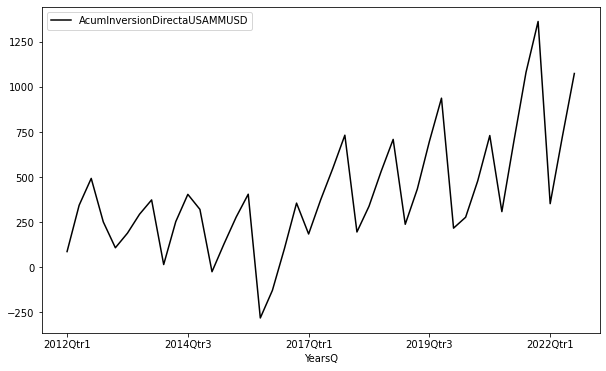

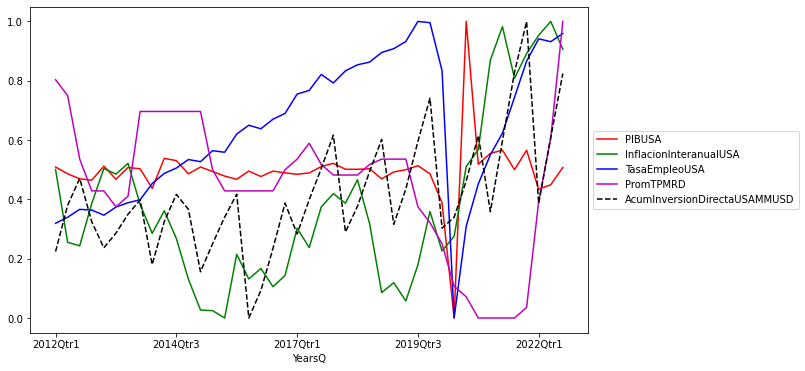

In [15]:
print('Los datos han sido escalados para apreciar el movimiento de las variables, indistintamente de la magnitud de sus unidades.')
for variable in variables_objetivo:
    print('------------------------------------------------------------------------------')
    print('\033[1m'+'Exploración Visual con Variable: '+'\033[0m','\033[1m'+variables_objetivo_dic[variable]+'\033[0m')
    print('------------------------------------------------------------------------------')
    df[['YearsQ',variable]].plot(x = 'YearsQ', color = 'black',figsize=(10,6))
    df_scale[variables_explicativas + [variable,'YearsQ']].plot(x = 'YearsQ',
                                                               #color = {'PIBUSA':'blue',
                                                               #         'InflacionInteranualUSA':'red',
                                                               #         'InflacionSubInteranualUSA':'pink',
                                                               #         'TasaEmpleoUSA':'green',
                                                               #         'PromTPMRD':'orange',
                                                               #         variable:'black'},
                                                               figsize=(10,6),
                                                               style = {'PIBUSA':'r-',
                                                                        'InflacionInteranualUSA':'g-',
                                                                        #'InflacionSubInteranualUSA':'y-',
                                                                        'TasaEmpleoUSA':'b-',
                                                                        'PromTPMRD':'m-',
                                                                         variable:'k--'})
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

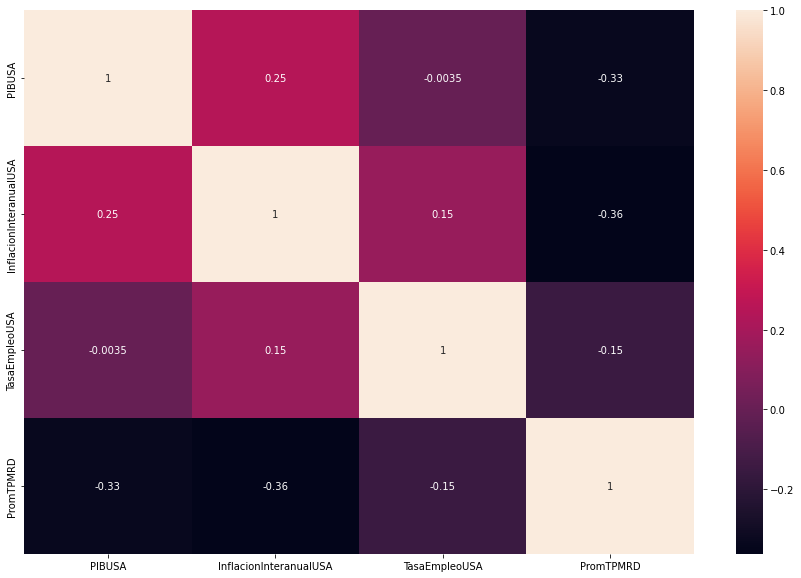

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df[variables_explicativas].corr(), annot=True)
plt.show()

In [31]:
df[variables_explicativas].corr()

,PIBUSA,InflacionInteranualUSA,TasaEmpleoUSA,PromTPMRD
PIBUSA,1.00,0.25,-0.00,-0.33
InflacionInteranualUSA,0.25,1.00,0.15,-0.36
TasaEmpleoUSA,-0.00,0.15,1.00,-0.15
PromTPMRD,-0.33,-0.36,-0.15,1.00


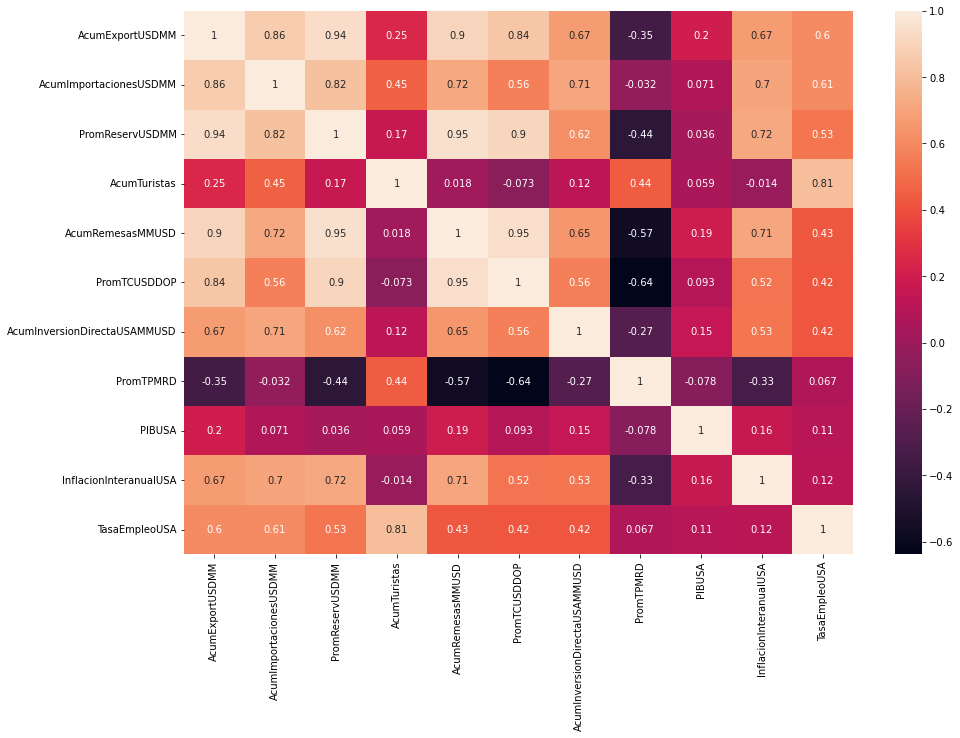

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns = ['Years','Trimestre','YearsQ','InflacionSubInteranualUSA']).corr(), annot=True)
plt.show()

In [17]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [18]:
PIBUSA = 2.8
InflacionInteranualUSA = 6.3
InflacionSubInteranualUSA = 5.7
TasaEmpleoUSA = 69.4
PromTPMRD = 0.085

hipotesis = [[PIBUSA,InflacionInteranualUSA,TasaEmpleoUSA,PromTPMRD]]

# Regresión

# Ignorando Periodo COVID

In [19]:
resultados = []

In [20]:
df = df[df['Years']!=2020].reset_index(drop=True)
df.head()

,Years,Trimestre,AcumExportUSDMM,AcumImportacionesUSDMM,PromReservUSDMM,AcumTuristas,AcumRemesasMMUSD,PromTCUSDDOP,AcumInversionDirectaUSAMMUSD,PromTPMRD,PIBUSA,InflacionInteranualUSA,InflacionSubInteranualUSA,TasaEmpleoUSA,YearsQ
0,2012,Qtr1,"1,642.54","4,165.90","3,019.30","1,466.63","1,076.13",38.93,87.14,0.07,3.30,4.94,3.94,66.99,2012Qtr1
1,2012,Qtr2,"1,797.30","4,441.30","3,119.00","1,212.48","1,014.34",39.04,343.89,0.07,1.80,2.71,3.36,67.13,2012Qtr2
2,2012,Qtr3,"1,843.49","4,570.80","3,125.08","1,205.60","1,053.35",39.13,492.68,0.05,0.70,2.60,3.53,67.31,2012Qtr3
3,2012,Qtr4,"1,912.39","4,473.80","3,107.97","1,162.32",901.56,39.84,251.60,0.05,0.40,3.91,3.75,67.30,2012Qtr4
4,2013,Qtr1,"1,794.97","3,975.50","3,184.50","1,458.59","1,116.69",40.77,108.32,0.05,3.50,4.97,5.23,67.18,2013Qtr1


------------------------------------------------------------------------------
                           EXPORTACIONES EN USDMM
------------------------------------------------------------------------------
Mejor estimador Ridge:  Ridge(alpha=10, solver='sparse_cg')
Variable: Exportaciones en USDMM
 
Intercepto: 2317.1626609742407
 
------------------------------------------------------------------------------
Coeficientes
------------------------------------------------------------------------------
                             
PIBUSA                  19.77
InflacionInteranualUSA 480.95
TasaEmpleoUSA          369.79
PromTPMRD               -0.27
 
------------------------------------------------------------------------------
Metricas del Modelo:
------------------------------------------------------------------------------
Error Absoluto Medio:  144.05499340803436
Error Cuadratico Medio:  144.05499340803436
Raiz Error Cuadratico Medio:  12.002291173273308
R Cuadrado:  0.794737010590

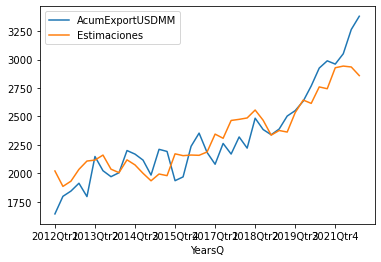

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
1  InflacionInteranualUSA                  0.71
2           TasaEmpleoUSA                  0.24
3               PromTPMRD                  0.04
0                  PIBUSA                  0.01
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable EXPORTACIONES EN USDMM:  2387.14
Ultimo valor observado para la variable EXPORTACIONES EN USDMM:  3381.79
Diferencia absol

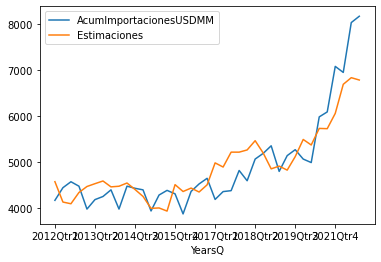

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
1  InflacionInteranualUSA                  0.75
2           TasaEmpleoUSA                  0.12
3               PromTPMRD                  0.10
0                  PIBUSA                  0.02
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable IMPORTACIONES EN USDMM:  5756.92
Ultimo valor observado para la variable IMPORTACIONES EN USDMM:  8173.1
Diferencia absolu

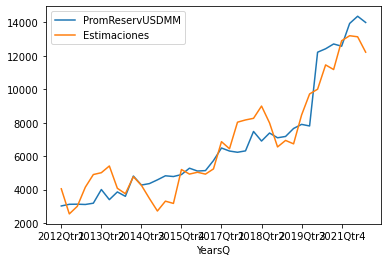

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
1  InflacionInteranualUSA                  0.81
2           TasaEmpleoUSA                  0.18
3               PromTPMRD                  0.01
0                  PIBUSA                  0.00
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable RESERVAS EN USDMM:  7555.77
Ultimo valor observado para la variable RESERVAS EN USDMM:  13998.89
Diferencia absoluta:  -64

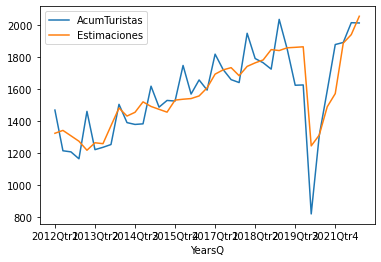

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
2           TasaEmpleoUSA                  0.80
3               PromTPMRD                  0.12
1  InflacionInteranualUSA                  0.06
0                  PIBUSA                  0.02
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable TURISTAS:  1817.44
Ultimo valor observado para la variable TURISTAS:  2011.02
Diferencia absoluta:  -193.58
Diferencia Rel

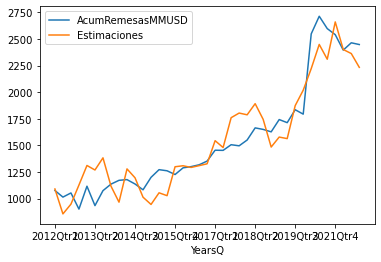

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
1  InflacionInteranualUSA                  0.79
2           TasaEmpleoUSA                  0.20
3               PromTPMRD                  0.01
0                  PIBUSA                  0.00
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable REMESAS EN USDMM:  1502.36
Ultimo valor observado para la variable REMESAS EN USDMM:  2448.41
Diferencia absoluta:  -946.0

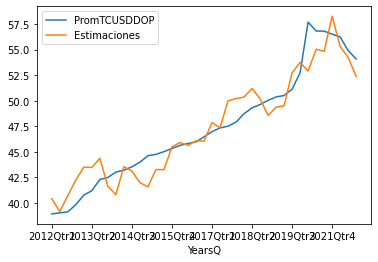

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
1  InflacionInteranualUSA                  0.60
2           TasaEmpleoUSA                  0.38
3               PromTPMRD                  0.02
0                  PIBUSA                  0.00
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable TIPO DE CAMBIO:  44.51
Ultimo valor observado para la variable TIPO DE CAMBIO:  54.09
Diferencia absoluta:  -9.58
Diferenc

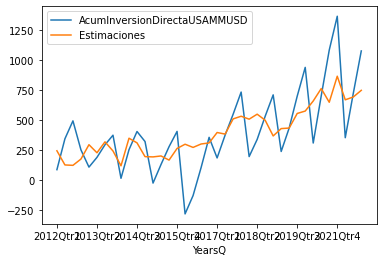

------------------------------------------------------------------------------
Importancia de Variables:
------------------------------------------------------------------------------
                Variables  Importancia Relativa
2           TasaEmpleoUSA                  0.44
3               PromTPMRD                  0.27
0                  PIBUSA                  0.18
1  InflacionInteranualUSA                  0.11
------------------------------------------------------------------------------
Hipotesis:
------------------------------------------------------------------------------
PIB USA:  2.8
Inflación Interanual USA:  6.3
Tasa de Empleo USA:  69.4
TPM:  0.085
 
------------------------------------------------------------------------------
Resultados:
------------------------------------------------------------------------------
Estimaciones para la variable INVERSION DIRECTA EN USDMM:  457.88
Ultimo valor observado para la variable INVERSION DIRECTA EN USDMM:  1074.0
Diferencia

In [21]:
#print('Modelo de Regresión Ridge - No Covid')
#print('------------------------------------------------------------------------------')
for variable in variables_objetivo:
    
    X = df[variables_explicativas]
    y = df[variable]
    
    scaler = StandardScaler()
    
    X = pd.DataFrame(scaler.fit_transform(X),columns = df[variables_explicativas].columns)
    
    # REGRESION MULTIPLE
    print('------------------------------------------------------------------------------')
    print('                           \033[1m'+variables_objetivo_dic[variable].upper()+'\033[0m')
    print('------------------------------------------------------------------------------')
    
    ridge_reg = Ridge()
    params_Ridge = {'alpha': [100,50,10,1,0.1,0.01,0.001,0.0001,0], 
                    "fit_intercept": [True, False], 
                    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, scoring='r2')
    Ridge_GS.fit(X,y)
    lr = Ridge_GS.best_estimator_
    lr.fit(X,y)
    print('Mejor estimador Ridge: ', Ridge_GS.best_estimator_)

    
    # METRICAS DE LA REGRESION
    
    print('Variable:','\033[1m'+variables_objetivo_dic[variable]+'\033[0m')
    print(' ')
    print('Intercepto:',lr.intercept_)
    df_coef = pd.DataFrame(scaler.inverse_transform(lr.coef_), index=X.columns, columns=[''])
    print(' ')
    print('------------------------------------------------------------------------------')
    print('\033[1m'+'Coeficientes'+'\033[0m')
    print('------------------------------------------------------------------------------')
    print(df_coef)
    predicciones = lr.predict(X)
    
    # METRICAS MODELO
    
    print(' ')
    print('------------------------------------------------------------------------------')
    print('\033[1m'+'Metricas del Modelo:'+'\033[0m')
    print('------------------------------------------------------------------------------')
    print('Error Absoluto Medio: ', mean_absolute_error(y,predicciones))
    print('Error Cuadratico Medio: ', mean_absolute_error(y,predicciones))
    print('Raiz Error Cuadratico Medio: ', np.sqrt(mean_absolute_error(y,predicciones)))
    print('R Cuadrado: ', r2_score(y,predicciones))
    comparacion = pd.concat([y.reset_index(drop=True),pd.Series(lr.predict(X))], axis=1)
    comparacion.columns = [variable,'Estimaciones']
    comparacion.index = df['YearsQ']
    comparacion.plot()
    plt.show()
    print('------------------------------------------------------------------------------')
    # IMPORTANCIA DE VARIABLES CON ARBOL DE DECISION
    
    dt = DecisionTreeRegressor()
    dt.fit(X,y)
    print('\033[1m'+'Importancia de Variables:'+'\033[0m')
    print('------------------------------------------------------------------------------')
    impacto = pd.DataFrame()
    impacto['Variables'] = X.columns
    impacto['Importancia Relativa'] = dt.feature_importances_
    print(impacto.sort_values(by='Importancia Relativa',ascending=False))
    print('------------------------------------------------------------------------------')
    
    # HIPOTESIS ESTIMACIONES
    
    print('\033[1m'+'Hipotesis:'+'\033[0m')
    print('------------------------------------------------------------------------------')
    print('PIB USA: ', hipotesis[0][0])
    print('Inflación Interanual USA: ', hipotesis[0][1])
    #print('Inflacion Subyacente Interanual USA: ', hipotesis[0][2])
    print('Tasa de Empleo USA: ', hipotesis[0][2])
    print('TPM: ', hipotesis[0][3])
    print(' ')
    print('------------------------------------------------------------------------------')
    print('\033[1m'+'Resultados:'+'\033[0m')
    print('------------------------------------------------------------------------------')
    ultimo_valor = df[variable].tail(1).iloc[0]
    pred = lr.predict(scaler.transform(hipotesis))[0]
    print('Estimaciones para la variable {}: '.format(variables_objetivo_dic[variable].upper()),round(lr.predict(scaler.transform(hipotesis))[0],2))
    print('Ultimo valor observado para la variable {}: '.format(variables_objetivo_dic[variable].upper()),round(ultimo_valor,2))
    print('Diferencia absoluta: ',round(pred - ultimo_valor,2))
    print('Diferencia Relativa: ', round(((pred - ultimo_valor)/ultimo_valor) * 100,2),'%')
    print('------------------------------------------------------------------------------')
    print(' ')
    print(' ')
    print(' ')
    
    r_2 = r2_score(y,predicciones)
    cambio = round(((pred - ultimo_valor)/ultimo_valor) * 100,2)
    
    resultados.append([variable, r_2, cambio, 'Regresion - Ridge', 'No Covid'])


In [22]:
resultados_df = pd.DataFrame(resultados, columns = ['Variable','R Cuadrado','Cambio','Modelo','Periodo'])

In [23]:
resultados_df[resultados_df['Variable']=='AcumImportacionesUSDMM']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
1,AcumImportacionesUSDMM,0.77,-29.56,Regresion - Ridge,No Covid


In [24]:
resultados_df[resultados_df['Variable']=='AcumExportUSDMM']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
0,AcumExportUSDMM,0.79,-29.41,Regresion - Ridge,No Covid


In [25]:
resultados_df[resultados_df['Variable']=='AcumInversionDirectaUSAMMUSD']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
6,AcumInversionDirectaUSAMMUSD,0.48,-57.37,Regresion - Ridge,No Covid


In [26]:
resultados_df[resultados_df['Variable']=='AcumRemesasMMUSD']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
4,AcumRemesasMMUSD,0.88,-38.64,Regresion - Ridge,No Covid


In [27]:
resultados_df[resultados_df['Variable']=='PromTCUSDDOP']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
5,PromTCUSDDOP,0.90,-17.70,Regresion - Ridge,No Covid


In [28]:
resultados_df[resultados_df['Variable']=='PromReservUSDMM']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
2,PromReservUSDMM,0.88,-46.03,Regresion - Ridge,No Covid


In [29]:
resultados_df[resultados_df['Variable']=='AcumTuristas']

,Variable,R Cuadrado,Cambio,Modelo,Periodo
3,AcumTuristas,0.73,-9.63,Regresion - Ridge,No Covid


# Resumen General

**Exploración visual:**
-	Pudimos ver que todas las variables objetivo tienen una tendencia al alza, con una volatilidad relativamente alta.

-	Todas las variables sufrieron caídas significativas en el periodo covid, a excepción de las remesas y la tasa de cambio, razón:
    *	Remesas: la política de subsidios de USA permitió a los dominicanos ausentes remitir más dinero a RD
    *	Tasa de Cambio: debido al cierre de las principales actividades generadoras de divisas, dígase exportaciones, importaciones y exportaciones, y sumado a una política monetaria flexible, se disminuyó significativamente el flujo de divisas, lo que se tradujo en un aumento de la demanda con respecto a la oferta y por ende un aumento en el tipo de cambio

-	Se pudo notar en sentido general un nivel de correlación positiva entre todas las variables objetivos con las variables explicativas, a excepción de la TPM, la cual solo mantuvo una relación positiva con respecto a la llegada de turistas.

-	Se pudo evidenciar un nivel de correlación relativamente adecuado entre las variables para fines de modelaje, con ausencia de multicolinealidad aparente, a excepción de la inflación interanual y la inflación interanual subyacente, por lo que se decidió excluir del modelo la inflación interanual subyacente ya que era la que menor nivel de correlación tenía con respecto a las variables objetivos.

**Modelado:**

-	Se excluye periodo COVID para evitar volatilidad

-	Se utilizó el algoritmo: Regresión Ridge Multiple para las estimaciones y Arboles de Decisión para evaluar la importancia de las variables

-	Se llevó acabo el ajuste de hiperparametros para los algoritmos ridge

-	Se permitió de manera voluntaria el sobreajuste a del árbol de decisión con el objetivo de tener unas predicciones lo más parecido al comportamiento histórico, sacrificando la capacidad de generalización, ya que la muestra es relativamente pequeña y este modelo no se iba a utilizar para predecir

**Resultados:**

Se plantea un escenario de hipótesis donde USA caería en recesión y unos posibles movimientos a la baja de las variables explicativas.

-	General: con todos los modelos y para todas las variables se puede apreciar una disminución de aproximadamente entre un 10% y un 50% con respecto al ultimo trimestre de los datos (septiembre 2022), aunque la mayoría de las variables disminuyen entre 20% y 30% 


-	Específicos:

        * Exportaciones una disminución de 26% con un 86% de certeza
        * Importaciones una disminución de 31% con un 81% de certeza
        * Reservas una disminución de 50% con un 91% de certeza
        * Turismo una disminución de 10% con un 80% de certeza
        * Remesas una disminución de 38.6% con un 88% de certeza
        * Tipo de Cambio una disminución de 17% con un 92% de certeza
        * Inversión Extranjera Directa una disminución de 64% con un 62% de certeza



-	Variables más importantes:

        *	Para Exportaciones: Inflación Interanual
        *	Para Importaciones: Inflación Interanual
        *	Para Reservas: Inflación Interanual
        *	Para Turismo: Tasa de Empleo
        *	Para Remesas: Inflación Interanual
        *	Para Tipo de Cambio: Inflación Interanual
        *	Para Inversión Extranjera Directa: Tasa de Empleo

**Opinión profesional del autor:**

Definitivamente una recesión tendría un impacto negativo en estos indicadores, aunque los resultados de los modelos, a pesar de tener buena capacidad de explicar la variabilidad (r cuadrado), no se ajustan mucho a la realidad, por ejemplo el modelo indica una disminución de casi 9 pesos en el tipo de cambio, algo irreal. Debido a razones tales: como la granularidad de los datos no es suficiente (trimestral, debido a que los datos de inversión extranjera directa solo aparece trimestral), la cantidad de datos producto del nivel de granularidad es relativamente poco (43 puntos de datos) y la influencia de las políticas adoptadas que no siempre se pueden capturar en términos cuantitativos.

Es por esto qué, en mi opinión, una potencial recesión no tuviese un impacto tan pronunciado en dichos indicadores, negativamente sí, pero no a magnitudes tan altas. Las estimaciones que me parecen un poco más alineadas con en términos de magnitud son las exportaciones y el turismo. Lo que si nos podemos llevar del modelo es quienes serán los grandes impactados, por orden de impacto de mayor a menor, ver debajo:

__Mayor a menor impacto negativo:__

1. Inversión Directa
2. Remesas
3. Exportaciones
4. Importaciones
5. Reservas
6. Tipo de Cambio 
7. Turismo


**Por:** Gilberto Almonte-F

# Fin